# Data analysis with `pandas` and `scikit-learn`

One of the strengths of the python language is the amazing collection of packages built on top of the core library. Here we'll learn about two libraries that are useful for "data science". 

`pandas` is a multi-purpose data analysis library built on top of numpy and matplotlib. It's great for analyzing tabular data.

https://pandas.pydata.org/

`scikit-learn` is a nice library of machine learning tools with a clean and consistent interface. 

http://scikit-learn.org/stable/


In [1]:
# this is how we typically import these libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# do this so the plots appear inline in the notebook:

%matplotlib inline

In [3]:
iris = pd.read_csv('data/iris_dataset.csv')

In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [7]:
type(iris['sepal_length'])

pandas.core.series.Series

In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The `describe` function just returns another `pandas DataFrame`, so we can use it for downstream analysis (more details on plotting below).

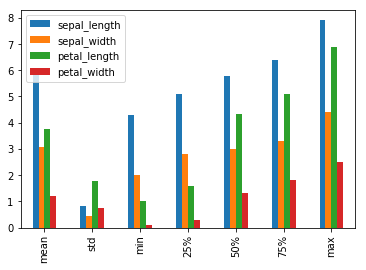

In [9]:
iris.describe().drop('count').plot.bar()

In [10]:
iris['species']
#iris['species'].unique()

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [11]:
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [12]:
set( iris['species'])

{'setosa', 'versicolor', 'virginica'}

# plotting with pandas
Pandas has all sorts of built-in plotting routines. If `dataframe` is a pandas `DataFrame`, `dataframe.plot.TAB` will tab complete to a list of plotting functions.

Pandas plotting is built on top of `matplotlib`, so plotting functions typically return `matplotlib` objects and `matplotlib.pyplot` commands can be used to tweak features of the plots just as when using plain-vanilla matplotlib. 

See the pandas visualization page:
https://pandas.pydata.org/pandas-docs/stable/visualization.html


The dataframe object has a couple plotting methods: `plot` and `hist` and maybe one or two others

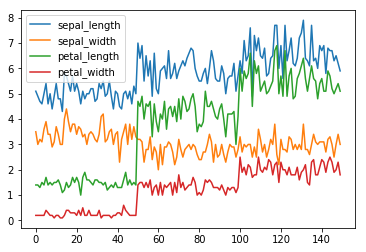

In [13]:
iris.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd60c8c8c88>,
      dtype=object)

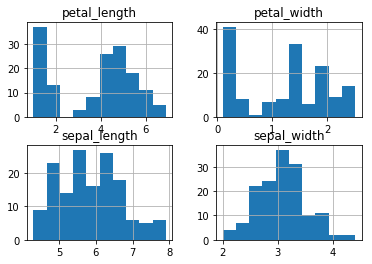

In [14]:
iris.hist()

Many more plotting methods are available in `dataframe.plot.*`, which you can browse using tab completion 

In [15]:
#iris.plot.<TAB>

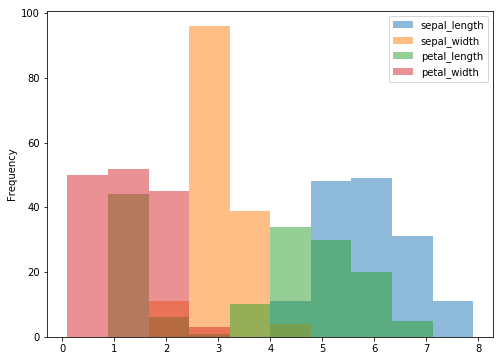

In [16]:
iris.plot.hist(figsize=(8,6),alpha=0.5)

Maybe a histogram isn't the best visualization, how about kernel density estimation, which produces smoothed density plots?

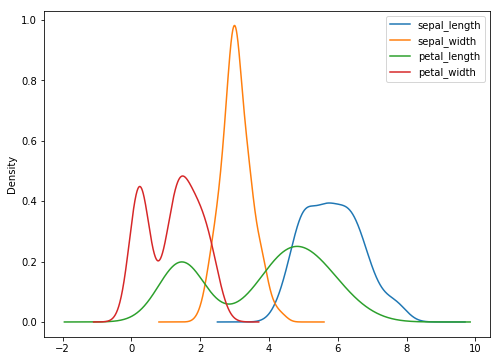

In [17]:
iris.plot.density(figsize=(8,6))

Scatter plots of one column against another are easy enough:

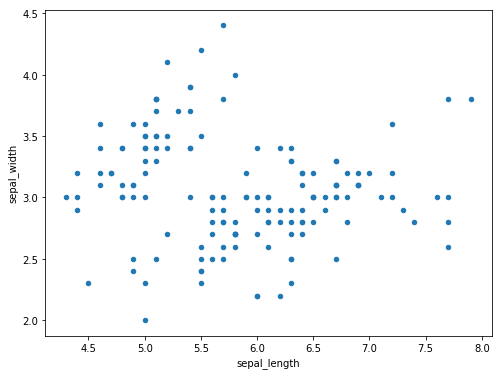

In [18]:
iris.plot.scatter( x='sepal_length', y='sepal_width', figsize=(8,6) )

### But what about the `species` structure in this dataset?

Let's add some color. This is super-easy to do using the plotting routines in the `seaborn` package, but for right now we'll stick with `pandas` and `matplotlib`.

Definitely check out the [seaborn gallery](https://seaborn.pydata.org/examples/index.html), though.



In [19]:
# there are a couple of ways of getting the set of species from the iris dataframe:

# Jesse mentioned using set to construct a python set object from a list or 
#  other list-like thing, which removes duplicates:

set( iris['species'] )

{'setosa', 'versicolor', 'virginica'}

In [20]:
# the Series object also has a "unique()" method
all_species = iris['species'].unique()

In [21]:
all_species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Take a second to deconstruct these `dict` and `zip` commands: this is a way of creating a python dictionary that comes up over and over again:

In [22]:
color_dict = dict(zip( set(iris['species']),'rgb'))
print(color_dict)

# actually it's nicer if they're sorted, in this case in alphabetical order
color_dict = dict(zip( sorted(set(iris['species'])),'rgb'))
print(color_dict)


{'setosa': 'r', 'virginica': 'g', 'versicolor': 'b'}
{'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}


### We can use a column of a dataframe (ie a `Series`) in a python list comprehension
(or a for loop, or anywhere else we need to iterate (loop over) elements)

In [23]:
# Make a list of colors, one for each row, using the values in the 'species' column:

colors = [ color_dict[x] for x in iris['species']] # list comprehension
colors[:5]

['r', 'r', 'r', 'r', 'r']

This is how we add a column to a dataframe:

In [24]:
iris['color'] = colors #iris['species'].map(color_dict)

In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,color
0,5.1,3.5,1.4,0.2,setosa,r
1,4.9,3.0,1.4,0.2,setosa,r
2,4.7,3.2,1.3,0.2,setosa,r
3,4.6,3.1,1.5,0.2,setosa,r
4,5.0,3.6,1.4,0.2,setosa,r


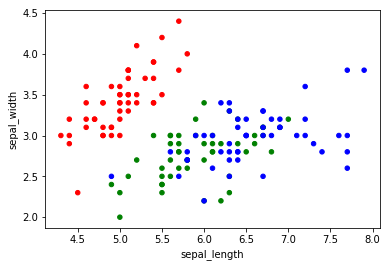

In [26]:
iris.plot.scatter( x='sepal_length', y='sepal_width',c=iris['color'] )

In [27]:
pd.plotting.scatter_matrix?

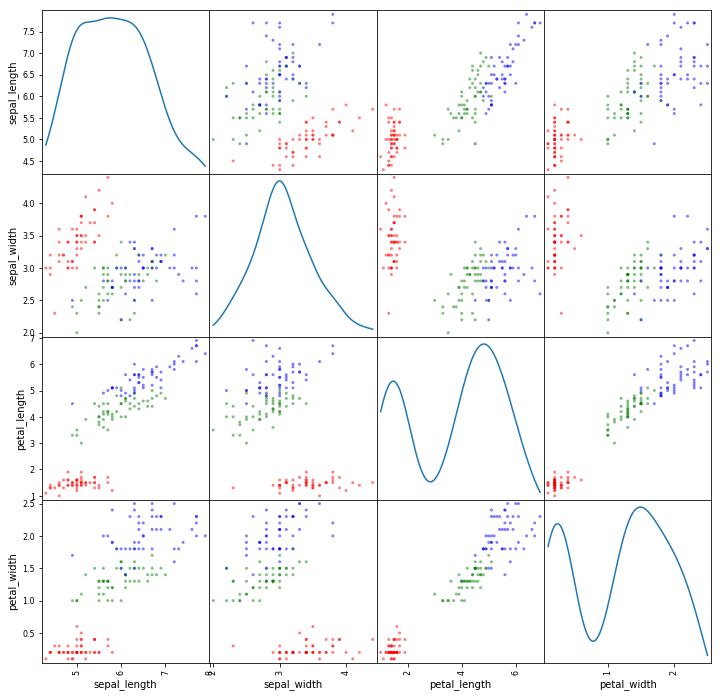

In [28]:

pd.plotting.scatter_matrix(iris,figsize=(12,12),diagonal='kde',c=iris['color']);

## Another quick example w/ pandas: rainfall again

In [29]:
df = pd.read_csv('../../homeworks/homework3/data/seattle_rainfall.csv')

In [30]:
df.head()

,Unnamed: 0,STATION,DATE,DAILYPrecip
0,28,WBAN:24233,2008-01-01 23:59,0.00
1,73,WBAN:24233,2008-01-02 23:59,0.40
2,104,WBAN:24233,2008-01-03 23:59,0.19
3,133,WBAN:24233,2008-01-04 23:59,0.03
4,172,WBAN:24233,2008-01-05 23:59,0.14


In [31]:
df.columns

Index(['Unnamed: 0', 'STATION', 'DATE', 'DAILYPrecip'], dtype='object')

In [32]:
#df = df.drop( 'DATE', axis=1)
#df = df.drop( 'Unnamed: 0', axis=1)
#df = df.drop('STATION',axis=1)

df.head()

,Unnamed: 0,STATION,DATE,DAILYPrecip
0,28,WBAN:24233,2008-01-01 23:59,0.00
1,73,WBAN:24233,2008-01-02 23:59,0.40
2,104,WBAN:24233,2008-01-03 23:59,0.19
3,133,WBAN:24233,2008-01-04 23:59,0.03
4,172,WBAN:24233,2008-01-05 23:59,0.14


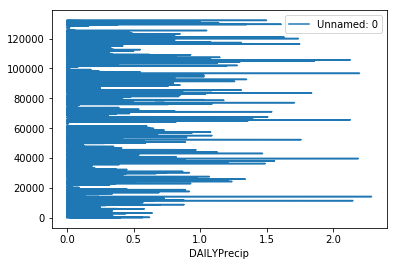

In [33]:
df.plot('DAILYPrecip')

We can do comparisons with dataframe columns (and note that we can access columns using square brackets or .)


In [34]:
df.DAILYPrecip>0

#type(df.DAILYPrecip>0)

0       False
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13       True
14      False
15      False
16      False
17      False
18       True
19       True
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27       True
28       True
29       True
        ...  
3623     True
3624     True
3625    False
3626    False
3627    False
3628    False
3629    False
3630    False
3631    False
3632    False
3633    False
3634    False
3635    False
3636     True
3637     True
3638     True
3639     True
3640     True
3641     True
3642     True
3643     True
3644    False
3645     True
3646     True
3647    False
3648    False
3649     True
3650     True
3651     True
3652    False
Name: DAILYPrecip, Length: 3653, dtype: bool

But what's cool is we can use the return values of these comparisons, which are columns with just `True` and `False` values, to get just the parts of a dataframe where there's a `True`

In [35]:
df[ df.DAILYPrecip>0 ].describe()

,Unnamed: 0,DAILYPrecip
count,1619.000000,1619.000000
mean,66292.048796,0.258481
std,38207.292290,0.322827
min,73.000000,0.010000
25%,32544.000000,0.050000
50%,65755.000000,0.140000
75%,101833.500000,0.340000
max,132164.000000,2.290000


## One more quick example of reading structured data with pandas: TCR beta chain sequences

In [36]:
tcrs = pd.read_csv( '../../lecture6_data/rep00_top_10000.tsv', sep='\t')


/home/pbradley/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
tcrs.head()

,rearrangement,amino_acid,frame_type,rearrangement_type,templates,reads,frequency,productive_frequency,cdr3_length,v_family,...,max_productive_frequency,max_frequency,counting_method,primer_set,release_date,sample_tags,fraction_productive,order_name,kit_id,total_t_cells
0,ACTCTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATC...,CSVEESYEQYF,In,VJ,10,311,0.000077,0.000096,33,TCRBV29,...,0.013719,0.019194,v2,Human-TCRB-PD1x,2013-12-13 22:23:05.529,"Age:55 Years,Biological Sex:Male,Cohort:Cohort...",0.797882,NaN,NaN,0
1,GAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGC...,NaN,Out,VDJ,3088,77915,0.019194,NaN,38,TCRBV05,...,0.013719,0.019194,v2,Human-TCRB-PD1x,2013-12-13 22:23:05.529,"Age:55 Years,Biological Sex:Male,Cohort:Cohort...",0.797882,NaN,NaN,0
2,GCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,In,VDJ,1772,44434,0.010946,0.013719,51,TCRBV10,...,0.013719,0.019194,v2,Human-TCRB-PD1x,2013-12-13 22:23:05.529,"Age:55 Years,Biological Sex:Male,Cohort:Cohort...",0.797882,NaN,NaN,0
3,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,CASSLRVGGYGYTF,In,VDJ,1763,44008,0.010841,0.013587,42,TCRBV07,...,0.013719,0.019194,v2,Human-TCRB-PD1x,2013-12-13 22:23:05.529,"Age:55 Years,Biological Sex:Male,Cohort:Cohort...",0.797882,NaN,NaN,0
4,TGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGG...,NaN,Out,VDJ,1241,31095,0.007660,NaN,52,TCRBV01,...,0.013719,0.019194,v2,Human-TCRB-PD1x,2013-12-13 22:23:05.529,"Age:55 Years,Biological Sex:Male,Cohort:Cohort...",0.797882,NaN,NaN,0


In [38]:
tcrs.shape

(10000, 81)

In [39]:
tcrs.columns

Index(['rearrangement', 'amino_acid', 'frame_type', 'rearrangement_type',
       'templates', 'reads', 'frequency', 'productive_frequency',
       'cdr3_length', 'v_family', 'v_gene', 'v_allele', 'd_family', 'd_gene',
       'd_allele', 'j_family', 'j_gene', 'j_allele', 'v_deletions',
       'd5_deletions', 'd3_deletions', 'j_deletions', 'n2_insertions',
       'n1_insertions', 'v_index', 'n1_index', 'n2_index', 'd_index',
       'j_index', 'v_family_ties', 'v_gene_ties', 'v_allele_ties',
       'd_family_ties', 'd_gene_ties', 'd_allele_ties', 'j_family_ties',
       'j_gene_ties', 'j_allele_ties', 'sequence_tags', 'v_shm_count',
       'v_shm_indexes', 'antibody', 'sample_name', 'species', 'locus',
       'product_subtype', 'kit_pool', 'total_templates',
       'productive_templates', 'outofframe_templates', 'stop_templates',
       'dj_templates', 'total_rearrangements', 'productive_rearrangements',
       'outofframe_rearrangements', 'stop_rearrangements', 'dj_rearrangements',
     

In [40]:
tcrs.v_allele.head()

0    1.0
1    1.0
2    1.0
3    NaN
4    1.0
Name: v_allele, dtype: float64

In [41]:
tcrs.describe()

,templates,reads,frequency,productive_frequency,cdr3_length,v_allele,d_allele,j_allele,v_deletions,d5_deletions,...,sample_cells_mass_estimate,fraction_productive_of_cells_mass_estimate,sample_cells,fraction_productive_of_cells,max_productive_frequency,max_frequency,fraction_productive,order_name,kit_id,total_t_cells
count,10000.000000,10000.000000,10000.000000,8265.000000,10000.000000,6217.000000,6426.000000,9998.0,10000.000000,10000.000000,...,10000.0,10000.000000,10000.0,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,0.0,0.0,10000.0
mean,7.345400,196.651400,0.000048,0.000057,43.028700,1.017533,1.117958,1.0,3.890500,3.839500,...,559458.0,0.320687,0.0,0.0,1.371890e-02,1.919402e-02,7.978822e-01,NaN,NaN,0.0
std,45.861261,1156.424847,0.000285,0.000262,5.773492,0.131255,0.322584,0.0,2.775442,3.079495,...,0.0,0.000000,0.0,0.0,1.734810e-18,3.469620e-18,1.110279e-16,NaN,NaN,0.0
min,1.000000,61.000000,0.000015,0.000019,3.000000,1.000000,1.000000,1.0,0.000000,0.000000,...,559458.0,0.320687,0.0,0.0,1.371890e-02,1.919402e-02,7.978822e-01,NaN,NaN,0.0
25%,3.000000,73.000000,0.000018,0.000023,39.000000,1.000000,1.000000,1.0,2.000000,1.000000,...,559458.0,0.320687,0.0,0.0,1.371890e-02,1.919402e-02,7.978822e-01,NaN,NaN,0.0
50%,4.000000,94.000000,0.000023,0.000029,42.000000,1.000000,1.000000,1.0,4.000000,4.000000,...,559458.0,0.320687,0.0,0.0,1.371890e-02,1.919402e-02,7.978822e-01,NaN,NaN,0.0
75%,6.000000,151.000000,0.000037,0.000046,46.000000,1.000000,1.000000,1.0,6.000000,6.000000,...,559458.0,0.320687,0.0,0.0,1.371890e-02,1.919402e-02,7.978822e-01,NaN,NaN,0.0
max,3088.000000,77915.000000,0.019194,0.013719,72.000000,2.000000,2.000000,1.0,30.000000,11.000000,...,559458.0,0.320687,0.0,0.0,1.371890e-02,1.919402e-02,7.978822e-01,NaN,NaN,0.0


In [42]:
tcrs['amino_acid'].value_counts()

CASSLGQNTEAFF         3
CASSWGPNTEAFF         3
CASSQHPGQSSGANVLTF    3
CASSTGVYGYTF          3
CASSQADNQPQHF         3
CASSDRDTGELFF         3
CASSLSPGGKETQYF       3
CASSQVEETQYF          2
CASSYPPGQGSYEQYF      2
CASSVGGGTEAFF         2
CASSQVAGNTIYF         2
CASSQDGGPGELFF        2
CASSYSRASSGNTIYF      2
CASSESGNQPQHF         2
CASRDSNQPQHF          2
CASSQGQGNTEAFF        2
CASSLGGVAEAFF         2
CASSSTGNYGYTF         2
CASSRTTGELFF          2
CASSLAGNTEAFF         2
CASSVAGTGGTEAFF       2
CASSFRDSTDTQYF        2
CASSDGGGTDTQYF        2
CASSLGGHQPQHF         2
CASSLVGTEAFF          2
CASSWGTSYEQYF         2
CASSAYNQPQHF          2
CASSQDRGGTEAFF        2
CASRQDGSTEAFF         2
CASSLDSYEQYF          2
                     ..
CASRGDFWGTGFGYTF      1
CSVGVGVGYGYTF         1
CASSGTGTDTQYF         1
CASSWRTGNTEAFF        1
CASSEAGTSGGDTQYF      1
CASSEGRTGEKLFF        1
CASSLDEKLFF           1
CASSLTSGNTDTQYF       1
CASTPRGTGYEKLFF       1
CASSVKGTHSMNTEAFF     1
CASSSIQPGPKFTEAF

# Machine learning with the `scikit-learn` package

borrowing heavily from "The Python Data Science Handbook" by Jake VanderPlas

https://jakevdp.github.io/PythonDataScienceHandbook/

## categories of machine learning
Broadly speaking, machine learning for data science can be broken down into **supervised** and **unsupervised** methods. 

In **supervised** machine learning, we have a set of labeled training data, and we'd like to train a classifier or predictor in order to make predictions on some new set of testing data. We may be trying to predict something discrete, like different categories of data (for example, biological species from flower dimensions in the iris dataset; this is called *classification*), or predicting something continuous-valued like a response variable as a function of predictor variable(s) (this is called *regression*). 

In **unsupervised** machine learning, we are trying to discover hidden structure in a dataset. Two broad approaches are *clustering*, where we look for subgroups of similar data points, and *dimensionality reduction*, where we project a high-dimensional dataset into a lower-dimensional space while trying to preserve important features of the data points (e.g., keeping points that were nearby in the high-dimensional space also nearby in the low-dimensional projection)  




## Unsupervised dimensionality reduction on the iris dataset

`scikit-learn` has several methods for dimensionality reduction. One popular method is principal components analysis (PCA). To apply PCA to the iris dataset, we need to create an array with just the numeric features we'll be using. 


In [43]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,color
0,5.1,3.5,1.4,0.2,setosa,r
1,4.9,3.0,1.4,0.2,setosa,r
2,4.7,3.2,1.3,0.2,setosa,r
3,4.6,3.1,1.5,0.2,setosa,r
4,5.0,3.6,1.4,0.2,setosa,r


In [44]:
# create a features array with just the measurement data

X_iris = iris.drop(['species','color'], axis=1)
X_iris.shape

(150, 4)

In [45]:
from sklearn.decomposition import PCA

# This is the general scikit-learn workflow
# 1. create and configure the model:
pca = PCA(n_components=2)

# 2. fit the model to the data
pca.fit(X_iris)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [47]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


Now we can `transform` the data using the fitted model.

In [48]:
X_pca = pca.transform(X_iris)
X_pca.shape

(150, 2)

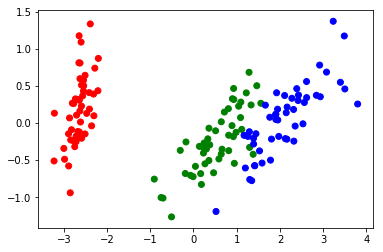

In [49]:
plt.scatter( X_pca[:,0], X_pca[:,1], c=colors )

In [50]:
#X_normed = X_iris.transform(lambda x: (x - x.mean()) / x.std())


### Digression on rescaling the data

This seems to work pretty well, but in some situations the multidimensional variables we are measuring are not directly comparable (for example because they have different units), in which case PCA will be dominated by the features that have the largest standard deviation. We can correct for this by first normalizing all columns to have mean 0 and standard deviation 1, using one of `scikit-learn`'s many preprocessing routines: 

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
X_iris_scaled = scaler.fit_transform( X_iris )

# check the mean, std-dev of the first column
print( np.mean( X_iris_scaled[:,0]), np.std( X_iris_scaled[:,0]))

-4.736951571734001e-16 1.0


[0.92461872 0.05306648]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[0.72962445 0.22850762]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


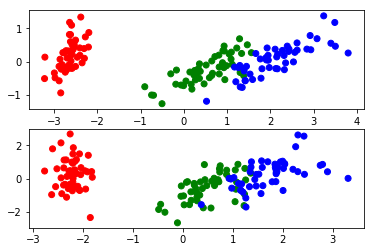

In [53]:
pca2 = PCA(n_components=2)

X_pca2 = pca2.fit_transform( X_iris_scaled )

plt.subplot(2,1,1)
plt.scatter( X_pca[:,0], X_pca[:,1], c=colors)

plt.subplot(2,1,2)
plt.scatter( X_pca2[:,0], X_pca2[:,1], c=colors)

print(pca.explained_variance_ratio_)
print(pca.components_)
print(pca2.explained_variance_ratio_)
print(pca2.components_)


## Unsupervised clustering on the iris dataset using K-means clustering

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_iris)
y_kmeans = kmeans.predict(X_iris)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

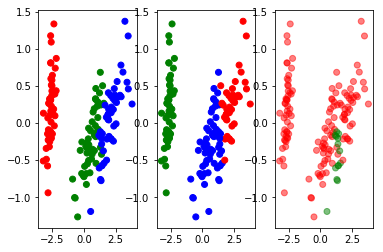

In [55]:
# put three plots side-by-side
plt.subplot(1,3,1)
plt.scatter( X_pca[:,0], X_pca[:,1], c=colors)

plt.subplot(1,3,2)
kmeans_colors = [ 'rgb'[x] for x in y_kmeans]
plt.scatter( X_pca[:,0], X_pca[:,1], c=kmeans_colors)

plt.subplot(1,3,3)
error_colors = [ ('red' if x!=y else 'green') for x,y in zip( colors, kmeans_colors) ]
plt.scatter( X_pca[:,0], X_pca[:,1], c=error_colors, alpha=0.5)




## Supervised classification on the iris dataset using Gaussian naive bayes classifier. 

A very simple approach to classification is to assume that the feature values for each class are drawn independently from one dimensional gaussian distributions (bell-shaped curves). The Gaussian naive bayes classifier implements this method.

In [56]:
## we need an array with the categories we are trying to classify:
y_iris = iris['species']
#y_iris.head()
y_iris.shape

(150,)

In [57]:
## choose the model
from sklearn.naive_bayes import GaussianNB

## create (and optionally configure) the model
model = GaussianNB()

## train the model
model.fit(X_iris, y_iris)

## see how well we do:
y_model = model.predict(X_iris)
y_model

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica',

Now we can see how well we did:

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_iris, y_model)

0.96

### What's the problem with the above analysis?

In [59]:
## redo, correctly

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

# create the model
model2 = GaussianNB()

# train the model
model2.fit(Xtrain, ytrain)

# predict on NEW DATA that wasn't used for training
y_model = model2.predict(Xtest)

# assess accuracy
accuracy_score(ytest, y_model)


0.9736842105263158

## Linear regression using scikit-learn

In linear regression we model a continuous-valued response variable as a linear combination of predictor variables. The parameters we need to fit are the coefficients for each predictor variable (the *slope* in the 1-D case), and if desired a constant offset (the *intercept*).

Let's start by making some slightly noisy data using a linear function:

[0.03910225 0.44870272 0.58738371 0.74878525 0.60050108 0.74601757
 0.11992314 0.31504375 0.41215186 0.28627336 0.69859793 0.23286697
 0.32732364 0.35948017 0.00594628 0.8180822  0.31205877 0.03626793
 0.19104276 0.65643333 0.35014034 0.38356761 0.90398891 0.72161489
 0.50341802 0.19330403 0.94441386 0.4413859  0.88008428 0.0694144
 0.10884589 0.5877278  0.7372649  0.7248375  0.93451038 0.73012535
 0.36768053 0.55348266 0.26213396 0.14341954 0.67737373 0.33708975
 0.22243837 0.61133414 0.1563057  0.79045911 0.10995346 0.99721675
 0.64445351 0.97063255]


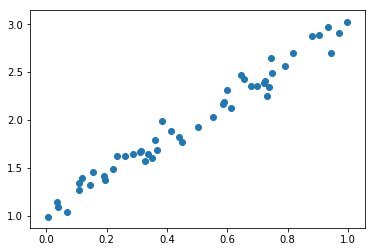

In [60]:
slope = 2.
intercept = -1

noise_factor = 0.1

num_points = 50

# create uniformly distributed x-values between 0 and 1
x = np.random.rand( num_points)
print(x)

# now create y values that are a linear function of the x-values, with some random noise added in
y = slope * x - intercept + noise_factor * np.random.randn(50)

plt.scatter(x, y);

In [61]:
from sklearn.linear_model import LinearRegression


In [62]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

A slightly tricky point is that scikit-learn routines generally expect a two-dimensional data array with one row for each observation (datapoint) and columns for each of the data values. Our set of x-values is actually a one-dimensional array (basically a list). So we need to change it's shape to make it two-dimensional, using the "reshape" command: 

In [63]:
print("old 1D shape:",x.shape)
X = x.reshape( (num_points,1)) # note: upper-case X
print("new 2D shape:", X.shape)

old 1D shape: (50,)
new 2D shape: (50, 1)


In [64]:
# now we can fit the model to the data:
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
# this is the slope value we recovered from the model: not too far from the actual value!
model.coef_

array([1.94018367])

In [66]:
# and this is the intercept:
model.intercept_

1.045182990602139

We can plot the fitted line:

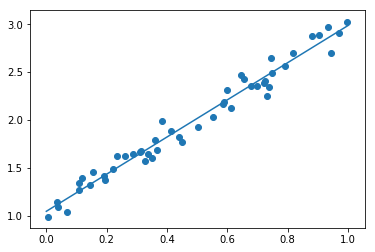

In [67]:
# create a linear array of new test points
xfit = np.linspace(0,1,10)

# reshape to make scikit-learn happy
Xfit = xfit.reshape((10,1))

# predict the y-values using our fitted model:
yfit = model.predict(Xfit)


plt.scatter(x, y)
plt.plot(xfit, yfit);